<a href="https://colab.research.google.com/github/khurramahmed/diseaseprediction/blob/main/diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

In [3]:
trainurl = 'https://raw.githubusercontent.com/khurramahmed/diseaseprediction/main/Training.csv'

In [43]:
train = pd.read_csv(trainurl)
train = train.iloc[:,1:133]

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
train.isnull()

In [13]:
y = train.iloc[:,1] # Training labels

In [45]:
x = train.iloc[:,1:132] # Training features

In [ ]:
x.head()

In [11]:
x.shape
y.shape

(4920,)

In [32]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) # Higher the score, more important is the feature towards explaining the output variable.

[4.21271293e-01 2.57350704e-02 7.84108696e-04 1.01449437e-04
 2.24187479e-03 2.30801448e-03 1.35592009e-02 8.27387931e-04
 1.87854356e-03 7.48926673e-06 7.26577197e-03 8.46500533e-03
 2.40133221e-02 3.83580204e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.23908404e-05 5.69387930e-04 2.76744485e-04
 4.56938736e-03 1.60005005e-04 4.54248330e-05 6.34913092e-03
 4.49816721e-03 1.35179296e-05 4.40619843e-04 2.01123425e-03
 1.19351522e-05 8.64076099e-05 5.29586864e-03 3.77928905e-03
 5.45796194e-04 2.02044493e-03 8.25536105e-03 3.70916571e-02
 5.41342069e-03 9.22075516e-05 3.11735267e-03 1.82190181e-03
 1.02865982e-02 6.05664440e-05 8.73180652e-03 2.08583417e-07
 0.00000000e+00 6.39925776e-05 6.01754002e-03 9.96626738e-03
 1.09970116e-04 2.75410131e-03 7.89988067e-04 7.78158628e-04
 1.41814113e-05 8.69298896e-05 6.93553979e-05 5.85232487e-03
 7.80874510e-05 0.00000000e+00 3.31627204e-05 5.90298504e-05
 6.94253965e-05 4.08012637e-05 9.81915298e-04 9.12981039e-04
 6.48926185e-06 5.047203

In [38]:
importance = pd.Series(model.feature_importances_, index = x.columns)

In [60]:
importance.nlargest(20).index

Index(['skin_rash', 'red_spots_over_body', 'pain_behind_the_eyes',
       'dischromic _patches', 'red_sore_around_nose', 'blister',
       'silver_like_dusting', 'pus_filled_pimples', 'scurring', 'blackheads',
       'skin_peeling', 'nodal_skin_eruptions', 'inflammatory_nails',
       'spotting_ urination', 'yellow_crust_ooze', 'small_dents_in_nails',
       'stomach_pain', 'mild_fever', 'malaise', 'yellowing_of_eyes'],
      dtype='object')

<Axes: >

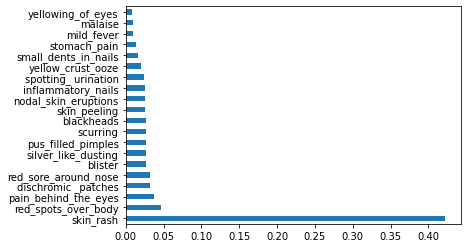

In [41]:
importance.nlargest(20).plot(kind = 'barh')

In [62]:
for_matrix = train[['skin_rash', 'red_spots_over_body', 'pain_behind_the_eyes',
       'dischromic _patches', 'red_sore_around_nose', 'blister',
       'silver_like_dusting', 'pus_filled_pimples', 'scurring', 'blackheads',
       'skin_peeling', 'nodal_skin_eruptions', 'inflammatory_nails',
       'spotting_ urination', 'yellow_crust_ooze', 'small_dents_in_nails',
       'stomach_pain', 'mild_fever', 'malaise', 'yellowing_of_eyes']]

In [63]:
corrmat = for_matrix.corr()
corr_important_features = corrmat.index

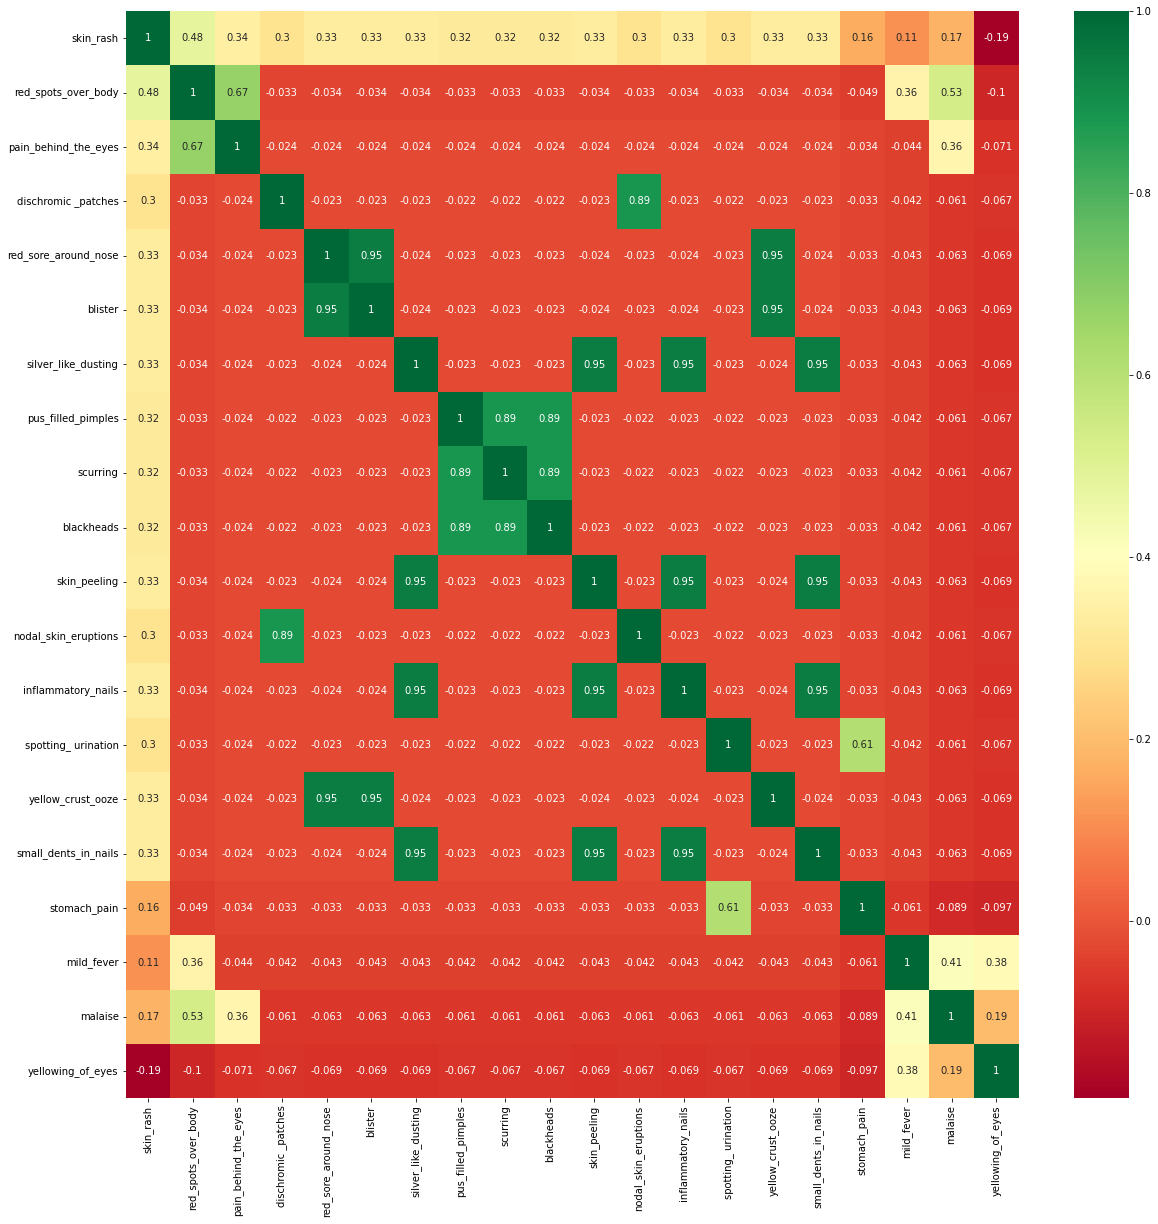

In [64]:
plt.figure(figsize = (20,20))
corr_heatmap = sns.heatmap(train[corr_important_features].corr(), annot = True, cmap = 'RdYlGn')